In [1]:
import glob
import pandas as pd
import mne
import matplotlib.pyplot as plt
from io import StringIO
import mne
from mne.io import read_raw_eeglab, read_epochs_eeglab
import numpy as np
from scipy import signal
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm, tqdm_notebook

from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from keras_tqdm import TQDMNotebookCallback
from tensorboard.plugins.hparams import api as hp
from livelossplot.tf_keras import PlotLossesCallback

import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import multiprocessing
from tpot import TPOTRegressor
from oct2py import octave

from joblib import Parallel, delayed
import multiprocessing
from joblib import wrap_non_picklable_objects
import json
import pickle
import os.path
from mpl_toolkits.mplot3d import axes3d
import timeit
from skimage.transform import resize
from timeit import default_timer as timer
from datetime import timedelta
import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.models import Model, load_model
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.utils import plot_model

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod import bayes_mixed_glm as glm

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV
# import keras
# from keras import layers
# from keras.models import Model
# from keras import optimizers
# from keras import callbacks
# from keras.utils import plot_model


/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/pyparsing.py:3168: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict


In [2]:
eegs = [
    'data/original/sub03/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub03/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub03/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
#     'data/original/sub03/exp02/eeg/SP 110RMT r1/clean-prestimulus.set', NO CMAP
#     'data/original/sub03/exp02/eeg/SP 110RMT r2/clean-prestimulus.set', NO CMAP
#     'data/original/sub03/exp03/eeg/SP 110RMT r1/clean-prestimulus.set', NO CMAP
    'data/original/sub03/exp03/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub03/exp03/eeg/SP 110RMT r3/clean-prestimulus.set',
#     'data/original/sub04/exp01/eeg/SP 110RMT r1/clean-prestimulus.set', NO CMAP
#     'data/original/sub04/exp01/eeg/SP 110RMT r2/clean-prestimulus.set', NO CMAP
#     'data/original/sub04/exp01/eeg/SP 110RMT r3/clean-prestimulus.set', NO CMAP
#     'data/original/sub05/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub06/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub06/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub06/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub06/exp02/eeg/SP 110RMT/clean-prestimulus.set',
    'data/original/sub07/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub07/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub07/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub08/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub08/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub08/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub08/exp02/eeg/SP 110RMT/clean-prestimulus.set',
    'data/original/sub08/exp03/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub08/exp03/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub08/exp03/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub12/exp02/eeg/SP 110RMT/clean-prestimulus.set',
#     'data/original/sub13/exp01/eeg/SP 110RMT/clean-prestimulus.set', LEFT HANDED
    'data/original/sub14/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub15/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub15/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub15/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub16/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub16/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub16/exp01/eeg/SP 110RMT r3/clean-prestimulus.set'
]


 # Read and process EEG

In [3]:
def read_eeg(path):
    eeg = octave.pop_loadset(path)
    new_trial_list = []
    for i in range(eeg.data.shape[2]):
        trial = eeg.data[:, :, i]
        time = np.linspace(-1000, -20, num=trial.shape[1])
        trial = pd.DataFrame(np.transpose(trial), columns=eeg.chanlocs.labels[0])
        trial['time'] = time
        new_trial_list.append(trial)
    return new_trial_list

def crop_trials(trial_list, duration_millis=500, sampling_rate=2048):
    new_trial_list = []
    for trial in trial_list:
        samples_to_pick = duration_millis * sampling_rate / 1000
        new_trial_list.append(trial.tail(int(samples_to_pick)))
    return new_trial_list, samples_to_pick

def band_max(freq, psd, interval):
    indices = []
    for el in freq:
        indices.append(el in interval)
    freq = freq[indices]
    psd = psd[indices]
    if (len(psd) == 0):
        return 0, 0
    i = np.argmax(np.abs(psd))
    return freq[i], psd[i]

def read_wavelets(path):
    with open(path, 'rb') as f:
        wt = pickle.load(f)
    return wt

def wavelet_band_max(df, interval):
    indices = []
    for el in (df.index * 1000):
        indices.append(el in interval)
    df = df[indices]
    if (df.shape[0] == 0):
        return 0, 0, 0, 0
    return df.mean(axis=1).max(), df.mean(axis=1).argmax() * 1000, df.mean(axis=0).max(), df.mean(axis=0).argmax()

def crop_mep_region(mep_frame):
    crop_start = 0.211
    crop_end = 0.4
    multiplier = 7499 / 1.4998
    start = int(crop_start * multiplier)
    end = int(crop_end * multiplier)
    mep_cropped = mep_frame.iloc[start:end, :]
    time = mep_frame.iloc[start:end, :]
    return mep_cropped, time

def get_apb_column_name(mep_frame):
    if 'L APB' in mep_frame:
        return 'L APB'
    else:
        return 'APB'

def open_mep_as_df(path):
    fileMep = open(path, "r+")
    mep_frames = fileMep.read().split('\n\n')
    df_list = []
    for mep_frame in mep_frames:
        df_list.append(pd.read_csv(StringIO(mep_frame), '\t'))
    return df_list

def get_mep_path(eeg_path):
    segments = eeg_path.split('/')
    segments[4] = 'mep'
    segments = segments[:-1]
    mep_path = '/'.join(segments) + '/*.txt'
    mep_path = glob.glob(mep_path)[0]
    return mep_path

def calculate_mep_size(mep_frame):
    mep_cropped, time = crop_mep_region(mep_frame)
    apb_name = get_apb_column_name(mep_frame)
    max_row = mep_frame.iloc[mep_cropped.idxmax(axis=0)[apb_name]]
    min_row = mep_frame.iloc[mep_cropped.idxmin(axis=0)[apb_name]]
    mep_size = max_row[apb_name] - min_row[apb_name]
    return mep_size, min_row, max_row

def crop_wavelet(wt, start_freq, end_freq, start_time_millis, end_time_millis):
    wt = wt[(wt.index >= start_freq) * (wt.index <= end_freq)]
    wt = wt.loc[:, wt.columns.isin(wt.columns[(wt.columns >= (start_time_millis/1000)) * (wt.columns <= (end_time_millis / 1000))])]
    return wt


In [4]:
features_filename = '55-features-v2.xlsx'
wavelet_path = 'wavelets-100/'


In [5]:
df = pd.read_excel(features_filename, index_col=0)

p1 = np.percentile(df['mep_category_cmap'], 50)
cat = np.ones(len(df['mep_category_cmap'])) * (df['mep_category_cmap'] > p1)
df['mep_category_cmap_across_subjects'] = cat


In [6]:
# -- Plot subject vs MEP size (absolute, CMAP, percentile).
# -- Plot abnormal MEPs.
# -- Record the abromal MEPs to exclude in the futre processing. sub14 has all bad MEPs.
# -- Calculate wavelet powers for all electrodes.
# Implement linear mixed models using wavelet powers (all electrodes).
# Observe performance of the mixed models.
# Calculate phase and power using paper from Sara J. Hussain.
# Create some visualizations with phase, power and MEP sizes.
# Implement mixed models using phase power (all electrodes).
# Observe mixed model performance difference between.


Text(16.299999999999997, 0.5, 'MEP Size (absolute)')

<Figure size 432x288 with 0 Axes>

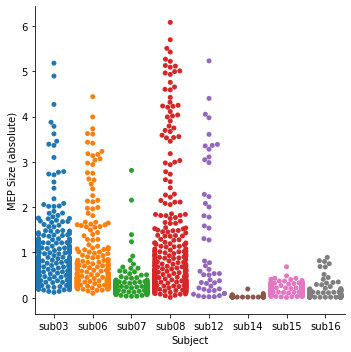

In [7]:
plt.figure()
ax = sns.catplot(x="sub", y="mep_size", data=df, kind = "swarm")
plt.xlabel('Subject')
plt.ylabel('MEP Size (absolute)')


Text(45.246276041666675, 0.5, 'Number of MEPs')

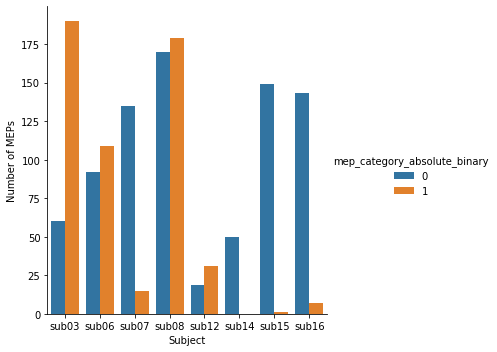

In [8]:
df_percentile = df.groupby(['sub', 'mep_category_absolute_binary']).count()
df_percentile = df_percentile.reset_index()
sns.catplot(x='sub', y='all_all_max_amplitude', data=df_percentile, hue='mep_category_absolute_binary', kind='bar')
plt.xlabel('Subject')
plt.ylabel('Number of MEPs')


Text(40.98837239583335, 0.5, 'Number of MEPs')

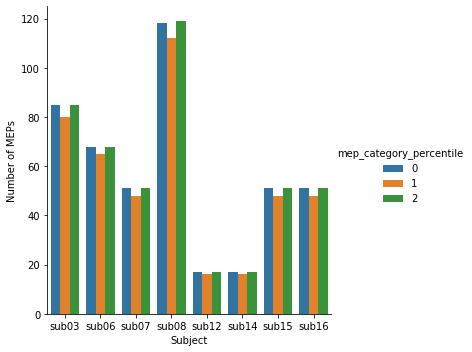

In [9]:
df_percentile = df.groupby(['sub', 'mep_category_percentile']).count()
df_percentile = df_percentile.reset_index()
sns.catplot(x='sub', y='all_all_max_amplitude', data=df_percentile, hue='mep_category_percentile', kind='bar')
plt.xlabel('Subject')
plt.ylabel('Number of MEPs')


Text(49.81750434027779, 0.5, 'Number of MEPs')

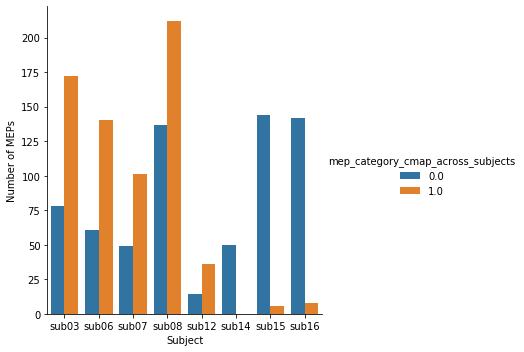

In [10]:
df_percentile = df.groupby(['sub', 'mep_category_cmap_across_subjects']).count()
df_percentile = df_percentile.reset_index()
sns.catplot(x='sub', y='all_all_max_amplitude', data=df_percentile, hue='mep_category_cmap_across_subjects', kind='bar')
plt.xlabel('Subject')
plt.ylabel('Number of MEPs')


In [11]:
for eeg_path in tqdm_notebook(eegs[24:24]):
    mep_path = get_mep_path(eeg_path)
    mep_frames = open_mep_as_df(mep_path)
    i = 0
    for mep_frame in mep_frames:
        apb_name = get_apb_column_name(mep_frame)
        plt.figure(figsize=(12, 4))
        plt.plot(mep_frame['s'], mep_frame[apb_name])
        plt.xlabel('Time (s)')
        plt.ylabel('MEP Size (mV)')
        plt.title(eeg_path + ' - ' + str(i))

        _, time = crop_mep_region(mep_frame)
        _, max_row, min_row = calculate_mep_size(mep_frame)
        plt.axvspan(time['s'].head(1).values[0], time['s'].tail(1).values[0], color='red', alpha=0.4)
        plt.plot(max_row['s'], max_row[apb_name], 'o', color='white')
        plt.plot(min_row['s'], min_row[apb_name], 'o', color='white')

        i = i+1


In [12]:
eegs = [
    'data/original/sub03/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub03/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub03/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
#     'data/original/sub03/exp02/eeg/SP 110RMT r1/clean-prestimulus.set', NO CMAP
#     'data/original/sub03/exp02/eeg/SP 110RMT r2/clean-prestimulus.set', NO CMAP
#     'data/original/sub03/exp03/eeg/SP 110RMT r1/clean-prestimulus.set', NO CMAP
    'data/original/sub03/exp03/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub03/exp03/eeg/SP 110RMT r3/clean-prestimulus.set',
#     'data/original/sub04/exp01/eeg/SP 110RMT r1/clean-prestimulus.set', NO CMAP
#     'data/original/sub04/exp01/eeg/SP 110RMT r2/clean-prestimulus.set', NO CMAP
#     'data/original/sub04/exp01/eeg/SP 110RMT r3/clean-prestimulus.set', NO CMAP
#     'data/original/sub05/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub06/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub06/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub06/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub06/exp02/eeg/SP 110RMT/clean-prestimulus.set',
    'data/original/sub07/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub07/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub07/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub08/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub08/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub08/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub08/exp02/eeg/SP 110RMT/clean-prestimulus.set',
    'data/original/sub08/exp03/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub08/exp03/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub08/exp03/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub12/exp02/eeg/SP 110RMT/clean-prestimulus.set',
#     'data/original/sub13/exp01/eeg/SP 110RMT/clean-prestimulus.set', LEFT HANDED
#     'data/original/sub14/exp01/eeg/SP 110RMT r1/clean-prestimulus.set', BAD MEPs
    'data/original/sub15/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub15/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub15/exp01/eeg/SP 110RMT r3/clean-prestimulus.set',
    'data/original/sub16/exp01/eeg/SP 110RMT r1/clean-prestimulus.set',
    'data/original/sub16/exp01/eeg/SP 110RMT r2/clean-prestimulus.set',
    'data/original/sub16/exp01/eeg/SP 110RMT r3/clean-prestimulus.set']

df2 = df[df['sub'] != 'sub14']
df = df2


In [13]:
time = pickle.load(open("90-wt_time.p", "rb")) / 1000
freq = pickle.load(open("90-wt_freq.p", "rb")) * 1000
channels = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'Cz', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'POz', 'O1', 'O2', 'EOG', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FC3', 'FCz', 'FC4', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CP4', 'P5', 'P1', 'P2', 'P6', 'PO5', 'PO3', 'PO4', 'PO6', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Oz']


In [14]:
def get_powers(epoch_row):
    path = 'wavelets-100/' + epoch_row['sub'] + '-' + epoch_row['exp'] + '-' + epoch_row['run'] + '-' + str(epoch_row['epoch']) + '.pickle'
    wt = read_wavelets(path)
    powers = {
        'sub': epoch_row['sub'],
        'exp': epoch_row['exp'],
        'run': epoch_row['run'],
        'epoch': epoch_row['epoch'],
        'mep_size': epoch_row['mep_size'],
        'mep_category_absolute': epoch_row['mep_category_absolute'],
        'mep_category_absolute_binary': epoch_row['mep_category_absolute_binary'],
        'mep_category_binary': epoch_row['mep_category_binary'],
        'mep_category_cmap': epoch_row['mep_category_cmap'],
        'mep_category_cmap_across_subjects': epoch_row['mep_category_cmap_across_subjects'],
        'mep_category_cmap_category': epoch_row['mep_category_cmap_category'],
        'mep_category_cmap_category_binary': epoch_row['mep_category_cmap_category_binary'],
        'mep_category_percentile': epoch_row['mep_category_percentile']
    }
    for i in range(wt.shape[2]):
        channel = channels[i]
        df_wt = pd.DataFrame(data=wt[:, :, i], columns=time)
        df_wt.insert(0, 'frequency', freq)
        df_wt = df_wt.set_index('frequency')
        df_wt_alpha = crop_wavelet(df_wt, 8, 13, -152, -2)
        df_wt_beta = crop_wavelet(df_wt, 13, 30, -152, -2)
        df_wt_gamma = crop_wavelet(df_wt, 30, 80, -152, -2)
        df_wt_beta_gamma = crop_wavelet(df_wt, 13, 80, -152, -2)
        powers['power_alpha_' + channel] = df_wt_alpha.values.flatten().mean()
        powers['power_beta_' + channel] = df_wt_beta.values.flatten().mean()
        powers['power_gamma_' + channel] = df_wt_gamma.values.flatten().mean()
        powers['power_beta_gamma_' + channel] = df_wt_beta_gamma.values.flatten().mean()
        powers['power_b2a_' + channel] = powers['power_beta_' + channel] / powers['power_alpha_' + channel]
        powers['power_g2a_' + channel] = powers['power_gamma_' + channel] / powers['power_alpha_' + channel]
        powers['power_bg2a_' + channel] = powers['power_beta_gamma_' + channel] / powers['power_alpha_' + channel]
    return powers

num_cores = multiprocessing.cpu_count()
powers_list = Parallel(n_jobs=num_cores)(delayed(get_powers)(epoch) for idx, epoch in tqdm(df.iterrows(), total=df.shape[0]))

# powers_list = []
# for i in powers:
#     for j in i:
#         powers_list.append(j)
df_powers = pd.DataFrame(powers_list)
df_powers.head()


100%|██████████| 1300/1300 [00:31<00:00, 40.67it/s]


epoch    exp  mep_category_absolute  mep_category_absolute_binary  \
0      0  exp01                      2                             1   
1      1  exp01                      1                             1   
2      2  exp01                      1                             1   
3      3  exp01                      1                             1   
4      4  exp01                      1                             1   

   mep_category_binary  mep_category_cmap  mep_category_cmap_across_subjects  \
0                    1           0.115301                                1.0   
1                    0           0.040348                                1.0   
2                    0           0.027107                                1.0   
3                    0           0.028739                                1.0   
4                    0           0.026983                                1.0   

   mep_category_cmap_category  mep_category_cmap_category_binary  \
0                           2                                  1   
1                           1                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   

   mep_category_percentile  ...  power_gamma_PO7  power_gamma_PO8  \
0                        2  ...        87.243346        64.419785   
1                        1  ...       145.651188        47.747208   
2                        0  ...        76.765030        33.717172   
3                        0  ...        60.320429        18.611400   
4                        0  ...        70.845930        63.546359   

   power_gamma_POz  power_gamma_Pz  power_gamma_T7  power_gamma_T8  \
0        26.387978       14.198650      819.168662      741.394298   
1        21.163166        6.473428     2130.054297     1508.957615   
2        24.209699       17.998997     2162.121944      654.244440   
3        10.707504       10.099230      916.418002      983.287860   
4        33.563531       32.883405     1372.099851     1552.527634   

   power_gamma_TP7  power_gamma_TP8           run    sub  
0       280.113971       373.782379  SP 110RMT r1  sub03  
1       346.476217       234.144417  SP 110RMT r1  sub03  
2       404.305350       275.941451  SP 110RMT r1  sub03  
3       256.196448       141.856228  SP 110RMT r1  sub03  
4       353.917023       129.661018  SP 110RMT r1  sub03  

[5 rows x 461 columns]

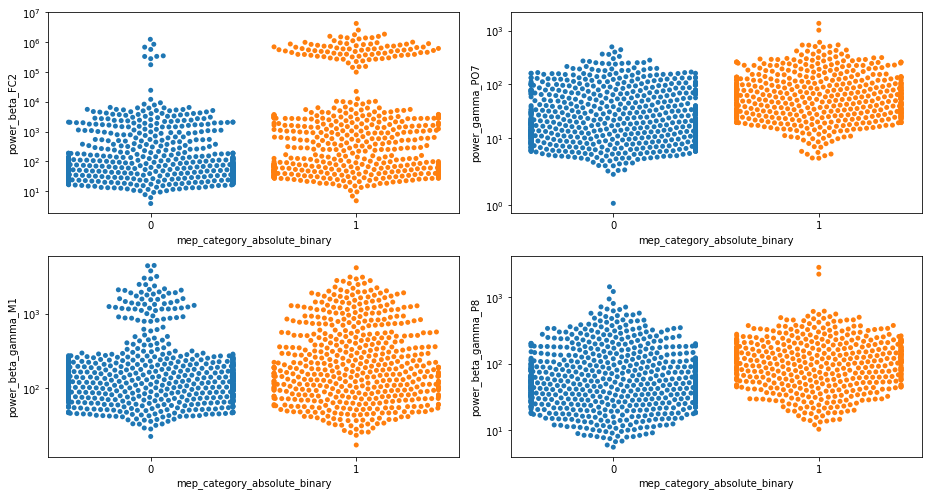

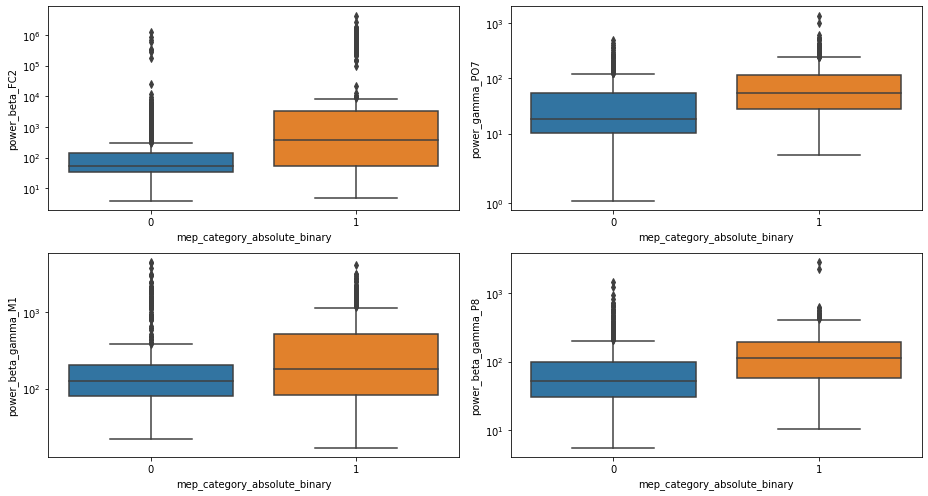

In [15]:
f, ax = plt.subplots(2, 2, figsize=(13, 7))
ax[0,0].set(yscale="symlog")
ax[0,1].set(yscale="symlog")
ax[1,0].set(yscale="symlog")
ax[1,1].set(yscale="symlog")
sns.swarmplot(y="power_beta_FC2", x="mep_category_absolute_binary", data=df_powers, ax=ax[0,0])
sns.swarmplot(y="power_gamma_PO7", x="mep_category_absolute_binary", data=df_powers, ax=ax[0,1])
sns.swarmplot(y="power_beta_gamma_M1", x="mep_category_absolute_binary", data=df_powers, ax=ax[1,0])
sns.swarmplot(y="power_beta_gamma_P8", x="mep_category_absolute_binary", data=df_powers, ax=ax[1,1])
plt.tight_layout()

f, ax = plt.subplots(2, 2, figsize=(13, 7))
ax[0,0].set(yscale="symlog")
ax[0,1].set(yscale="symlog")
ax[1,0].set(yscale="symlog")
ax[1,1].set(yscale="symlog")
sns.boxplot(y="power_beta_FC2", x="mep_category_absolute_binary", data=df_powers, ax=ax[0,0])
sns.boxplot(y="power_gamma_PO7", x="mep_category_absolute_binary", data=df_powers, ax=ax[0,1])
sns.boxplot(y="power_beta_gamma_M1", x="mep_category_absolute_binary", data=df_powers, ax=ax[1,0])
sns.boxplot(y="power_beta_gamma_P8", x="mep_category_absolute_binary", data=df_powers, ax=ax[1,1])
plt.tight_layout()

Text(0.5, 1.0, 'Beta/Alpha Power Histogram of Large MEP')

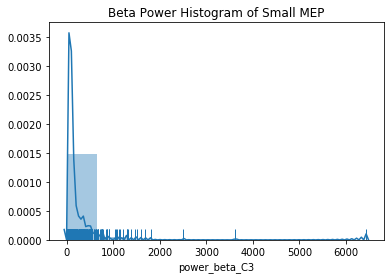

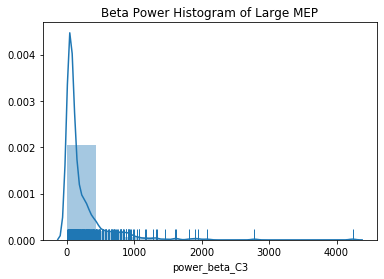

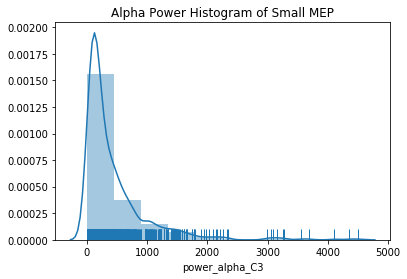

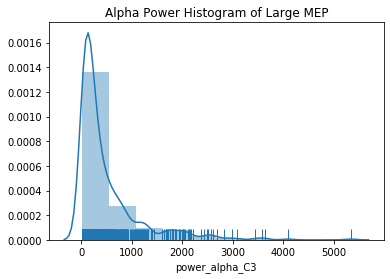

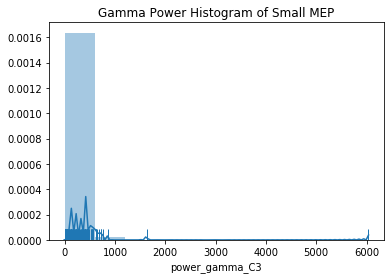

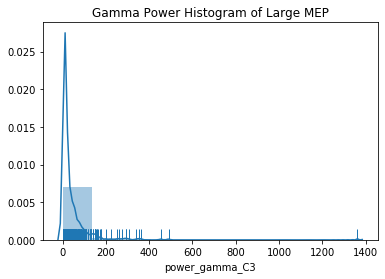

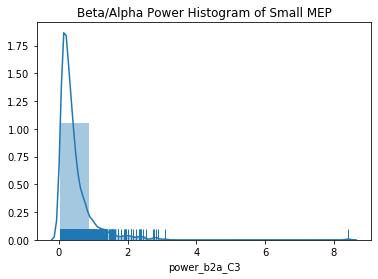

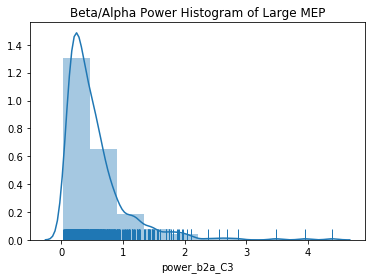

In [16]:
plt.figure()
sns.distplot(df_powers[df_powers['mep_category_absolute_binary'] == 0]['power_beta_C3'], bins=10, rug=True)
plt.title('Beta Power Histogram of Small MEP')

plt.figure()
sns.distplot(df_powers[df_powers['mep_category_absolute_binary'] == 1]['power_beta_C3'], bins=10, rug=True)
plt.title('Beta Power Histogram of Large MEP')

plt.figure()
sns.distplot(df_powers[df_powers['mep_category_absolute_binary'] == 0]['power_alpha_C3'], bins=10, rug=True)
plt.title('Alpha Power Histogram of Small MEP')

plt.figure()
sns.distplot(df_powers[df_powers['mep_category_absolute_binary'] == 1]['power_alpha_C3'], bins=10, rug=True)
plt.title('Alpha Power Histogram of Large MEP')

plt.figure()
sns.distplot(df_powers[df_powers['mep_category_absolute_binary'] == 0]['power_gamma_C3'], bins=10, rug=True)
plt.title('Gamma Power Histogram of Small MEP')

plt.figure()
sns.distplot(df_powers[df_powers['mep_category_absolute_binary'] == 1]['power_gamma_C3'], bins=10, rug=True)
plt.title('Gamma Power Histogram of Large MEP')

plt.figure()
sns.distplot(df_powers[df_powers['mep_category_absolute_binary'] == 0]['power_b2a_C3'], bins=10, rug=True)
plt.title('Beta/Alpha Power Histogram of Small MEP')

plt.figure()
sns.distplot(df_powers[df_powers['mep_category_absolute_binary'] == 1]['power_b2a_C3'], bins=10, rug=True)
plt.title('Beta/Alpha Power Histogram of Large MEP')


In [17]:
def get_rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)**2).values.mean())

# Linear Regression - one electrode

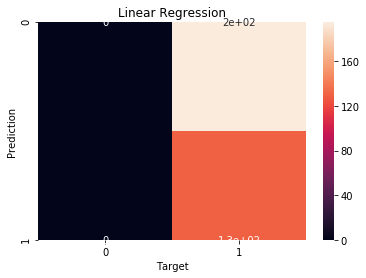

In [18]:
accuracy_list = []
x_train, x_test, y_train, y_test = train_test_split(df_powers.drop([
    'epoch',
    'exp',
    'run',
    'sub',
    'mep_category_absolute',
    'mep_category_absolute_binary',
    'mep_category_binary',
    'mep_category_cmap',
    'mep_category_cmap_across_subjects',
    'mep_category_cmap_category',
    'mep_category_cmap_category_binary',
    'mep_category_percentile',
    'mep_size'
], axis=1), df_powers['mep_category_absolute_binary'])
model = LogisticRegression().fit(x_train[['power_beta_FC2']], y_train)
y_pred = model.predict(x_test[['power_beta_FC2']])
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Linear Regression')

accuracy_list.append({'sub': 'all', 'accuracy': acc, 'model': 'Logistic Regression - power_beta_FC2', 'rmse': get_rmse(y_test, y_pred)})

# Linear Regression - all electrodes

{'sub': 'all', 'accuracy': 0.7538461538461538, 'model': 'Logistic Regression - all electrodes', 'rmse': 0.4961389383568338}


Text(0.5, 1, 'Linear Regression')

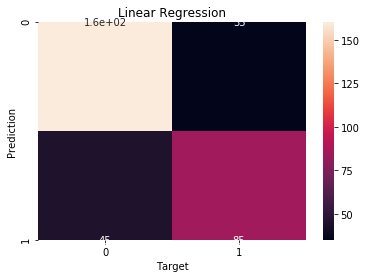

In [19]:
model = LogisticRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
acc = {'sub': 'all', 'accuracy': model.score(x_test, y_test), 'model': 'Logistic Regression - all electrodes', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Linear Regression')

# SVC

{'sub': 'all', 'accuracy': 0.6, 'model': 'SVC', 'rmse': 0.6324555320336759}


Text(0.5, 1, 'SVC')

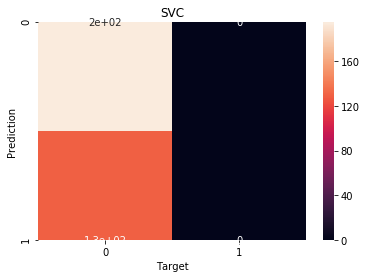

In [20]:
model = SVC().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
acc = {'sub': 'all', 'accuracy': model.score(x_test, y_test), 'model': 'SVC', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('SVC')

# Decision Tree

{'sub': 'all', 'accuracy': 0.7476923076923077, 'model': 'Decision Tree', 'rmse': 0.5023023913019848}


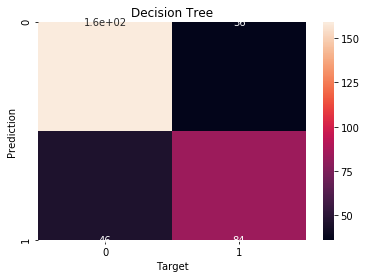

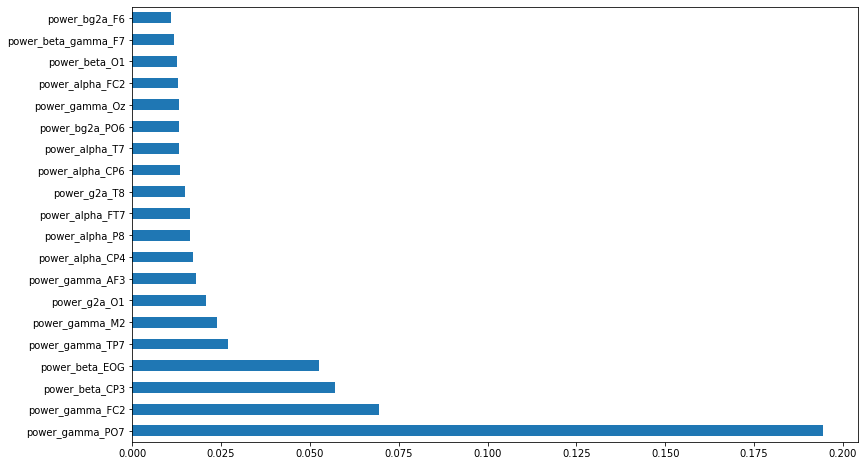

In [21]:
model = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
acc = {'sub': 'all', 'accuracy': model.score(x_test, y_test), 'model': 'Decision Tree', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Decision Tree')

plt.figure(figsize=(13,8))
feat_importances = pd.Series(model.feature_importances_, index=x_test.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# SGD

{'sub': 'all', 'accuracy': 0.6861538461538461, 'model': 'SGD', 'rmse': 0.5602197371087115}


/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Text(0.5, 1, 'SGD')

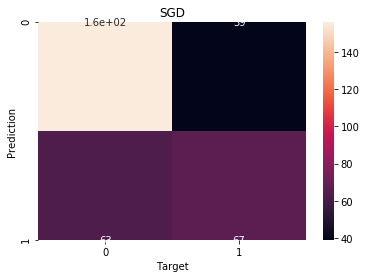

In [22]:
model = SGDClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
acc = {'sub': 'all', 'accuracy': model.score(x_test, y_test), 'model': 'SGD', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('SGD')

# Gradient Boosting

{'sub': 'all', 'accuracy': 0.7846153846153846, 'model': 'GradientBoostingClassifier', 'rmse': 0.4640954808922571}


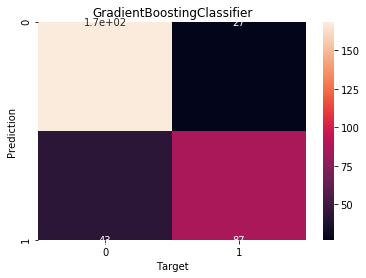

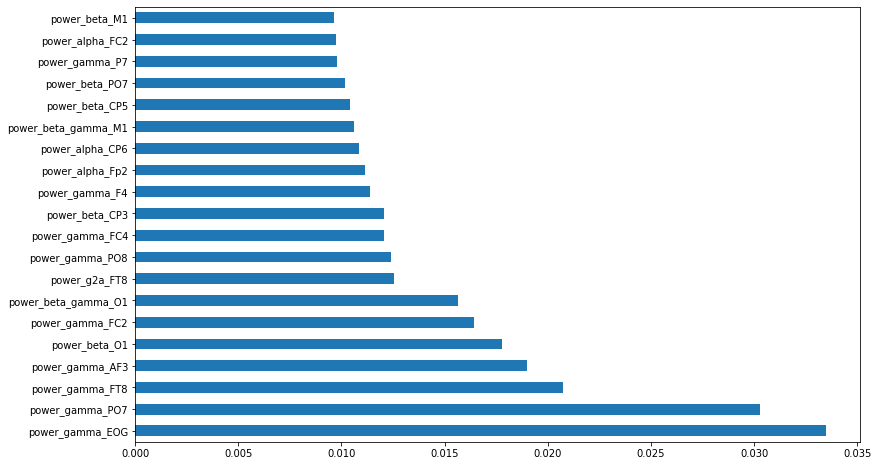

In [23]:
model = GradientBoostingClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
acc = {'sub': 'all', 'accuracy': model.score(x_test, y_test), 'model': 'GradientBoostingClassifier', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('GradientBoostingClassifier')

plt.figure(figsize=(13,8))
feat_importances = pd.Series(model.feature_importances_, index=x_test.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# Random Forest

{'sub': 'all', 'accuracy': 0.7538461538461538, 'model': 'Random Forest', 'rmse': 0.4961389383568338}


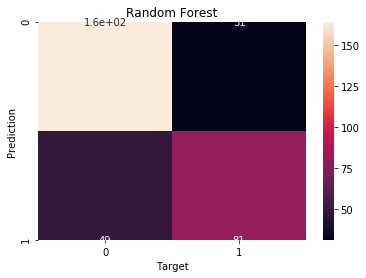

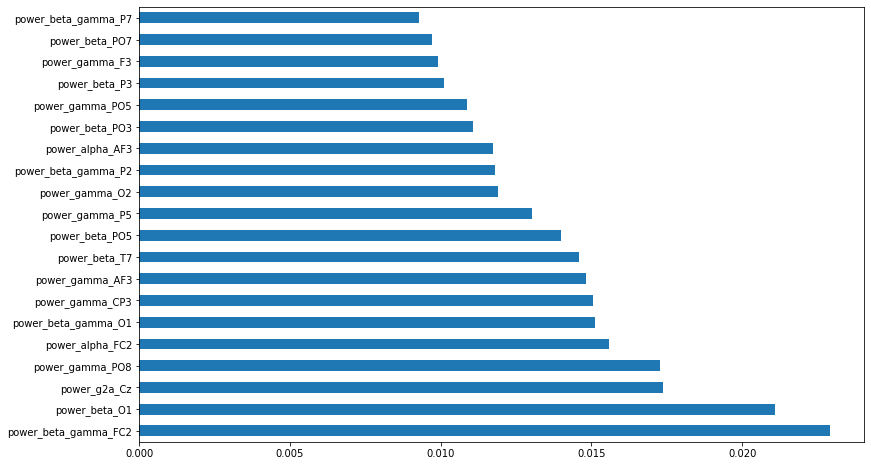

In [24]:
model = RandomForestClassifier().fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
acc = {'sub': 'all', 'accuracy': model.score(x_test, y_test), 'model': 'Random Forest', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Random Forest')

plt.figure(figsize=(13,8))
feat_importances = pd.Series(model.feature_importances_, index=x_test.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [25]:
pd.DataFrame(accuracy_list)

accuracy                                 model      rmse  sub
0  0.400000  Logistic Regression - power_beta_FC2  0.774597  all
1  0.753846  Logistic Regression - all electrodes  0.496139  all
2  0.600000                                   SVC  0.632456  all
3  0.747692                         Decision Tree  0.502302  all
4  0.686154                                   SGD  0.560220  all
5  0.784615            GradientBoostingClassifier  0.464095  all
6  0.753846                         Random Forest  0.496139  all

# Correlation matrix

In [26]:
def plot_corr(corr_arr, title):
    df_corr = pd.DataFrame(corr_arr)
    f = plt.figure(figsize=(200, 100))
    plt.matshow(np.abs(df_corr.corr()), fignum=f.number)
    plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14, rotation=45)
    plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title(title, fontsize=16)

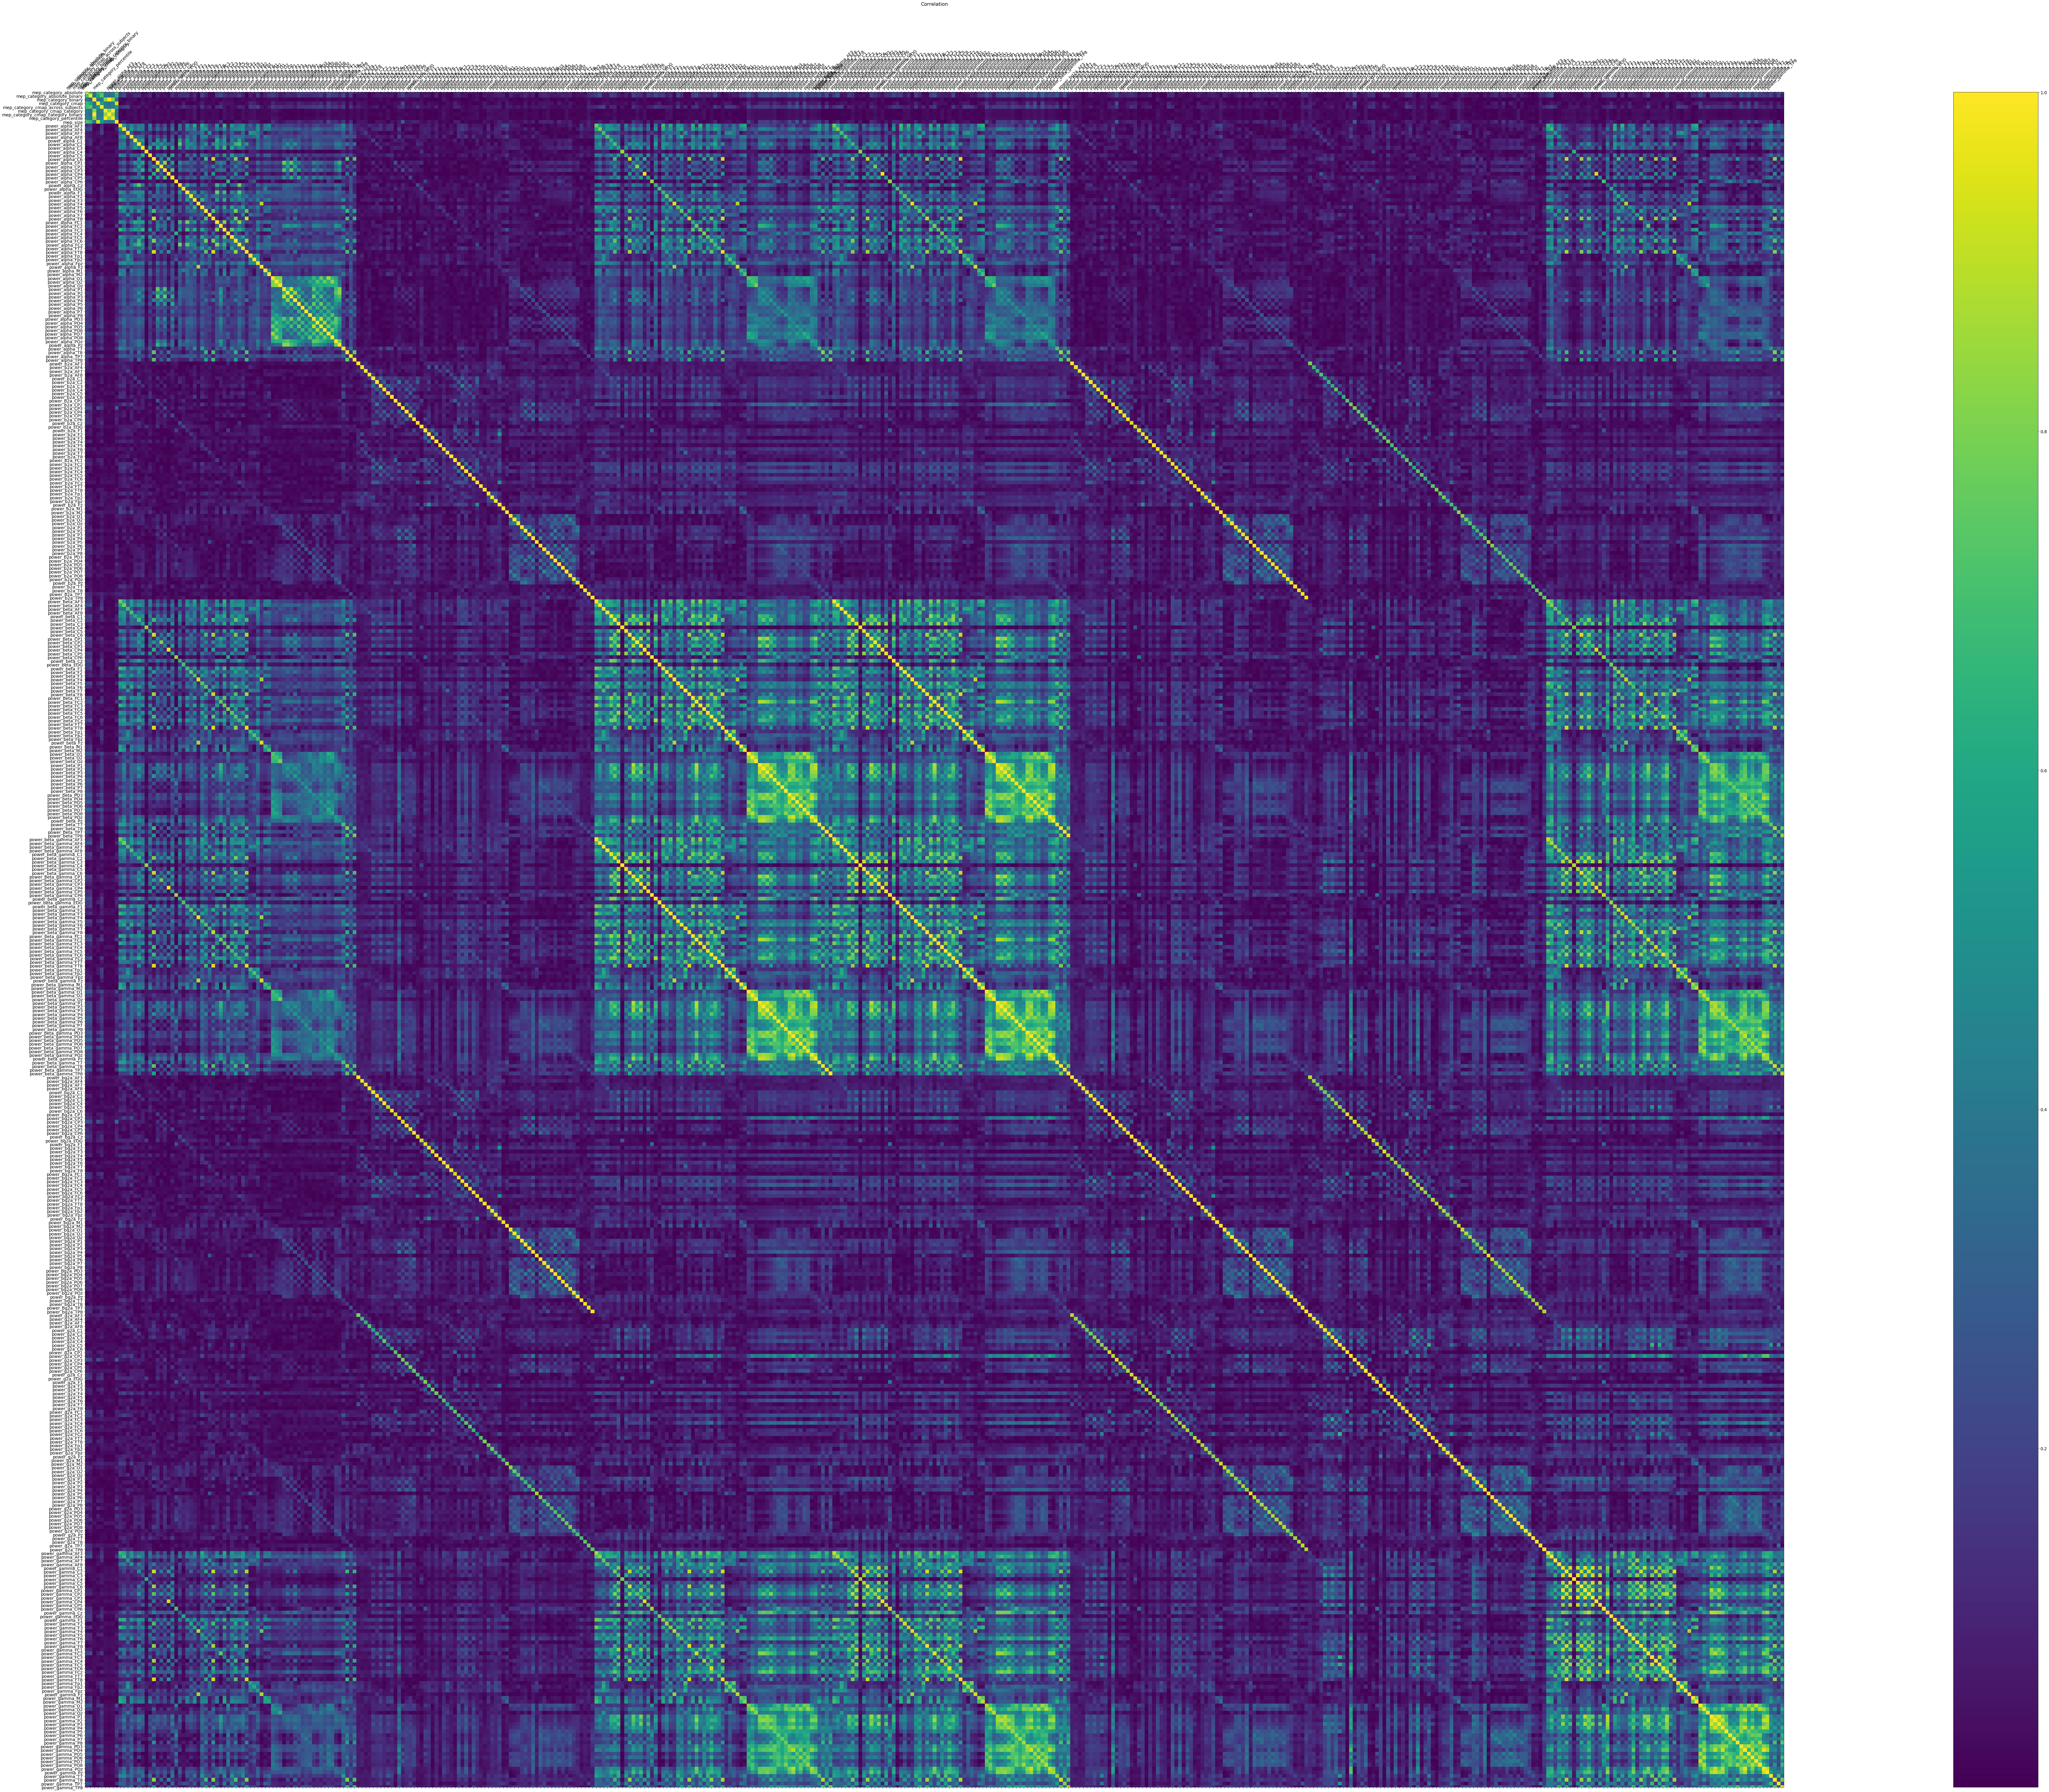

In [27]:
plot_corr(df_powers.drop(['epoch', 'exp', 'run', 'sub'], axis=1), 'Correlation')

# Recursive feature elimination with Random forest

In [29]:
model = RandomForestClassifier()
rfecv = RFECV(estimator=model, step=1, scoring='accuracy')
rfecv.fit(x_train, y_train)

RFECV(cv=None,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [30]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 151


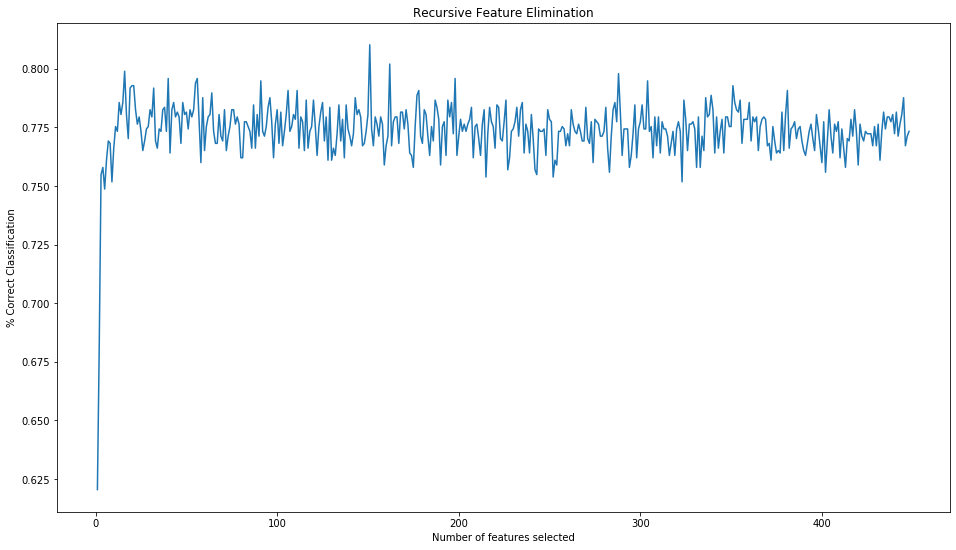

In [31]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination')
plt.xlabel('Number of features selected')
plt.ylabel('% Correct Classification')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()

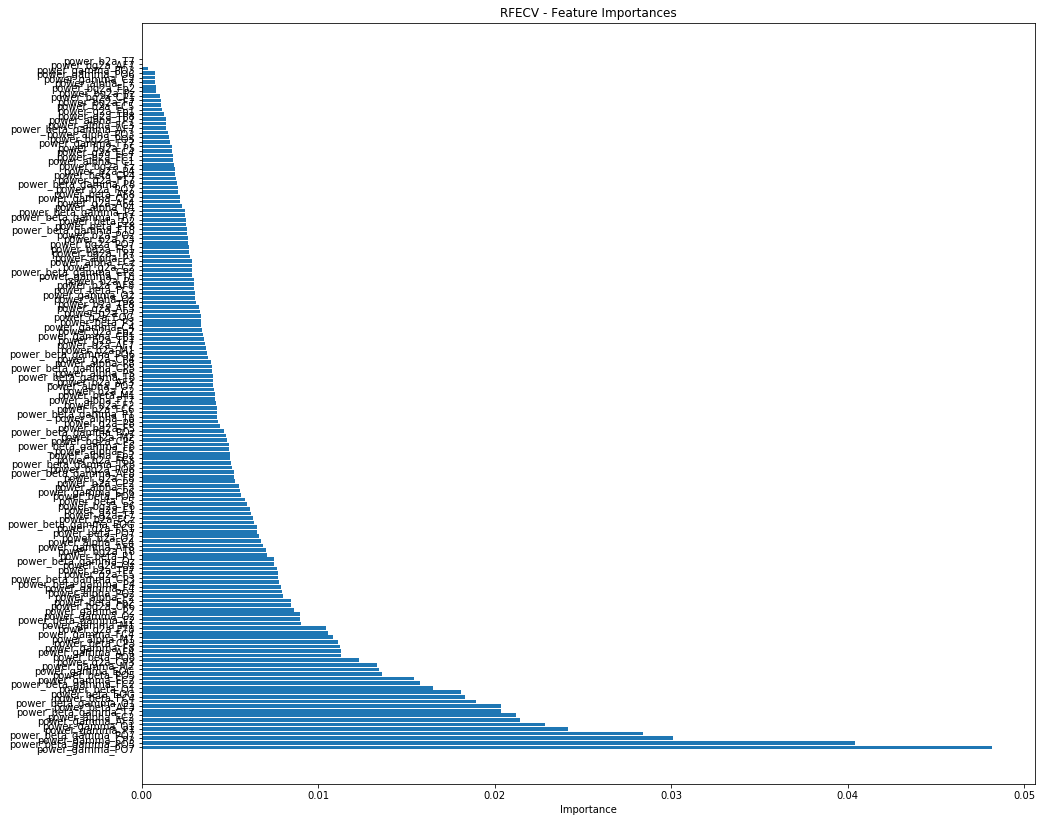

In [32]:
dset = pd.DataFrame()
dset['attr'] = x_train.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1).columns.values
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'])
plt.title('RFECV - Feature Importances')
plt.xlabel('Importance')
plt.show()

{'sub': 'all', 'accuracy': 0.7723076923076924, 'model': 'Random Forest', 'rmse': 0.47717115136217914}


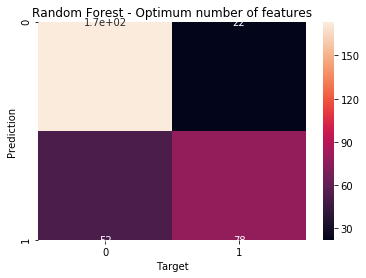

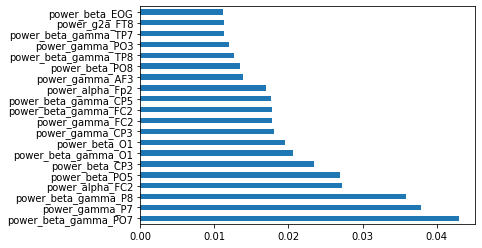

In [33]:
model = RandomForestClassifier().fit(x_train.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1), y_train)
y_pred = model.predict(x_test.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1))
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
acc = {'sub': 'all', 'accuracy': model.score(x_test.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1), y_test), 'model': 'Random Forest', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Random Forest - Optimum number of features')

plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=x_test.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# RFE on Linear regression

In [100]:
df_powers.to_excel('105-powers.xlsx')

Optimal number of features for Logistic Regression: 142


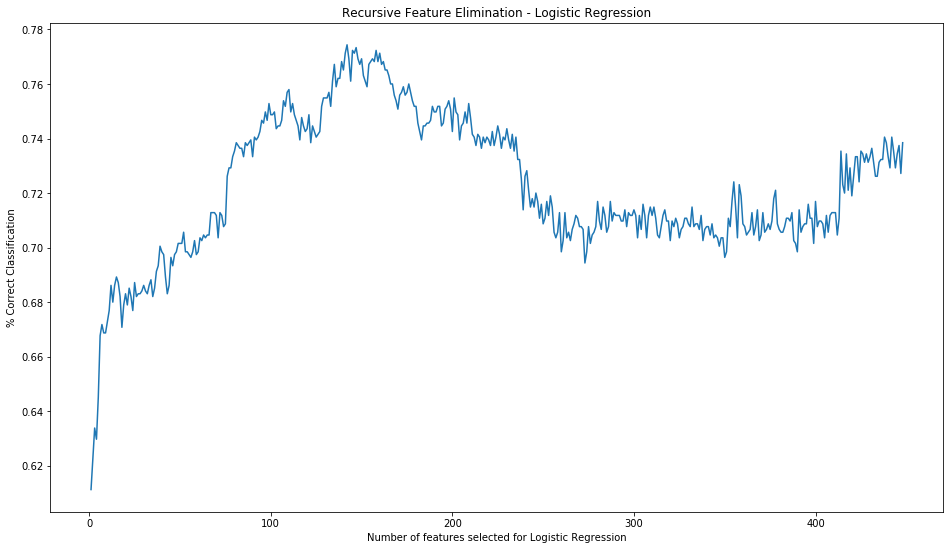

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [99]:
model = LogisticRegression()
rfecv = RFECV(estimator=model, step=1, scoring='accuracy')
rfecv.fit(x_train, y_train)
print('Optimal number of features for Logistic Regression: {}'.format(rfecv.n_features_))

# Plot accuracy vs number of features.
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination - Logistic Regression')
plt.xlabel('Number of features selected for Logistic Regression')
plt.ylabel('% Correct Classification')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Plot important features.
dset = pd.DataFrame()
dset['attr'] = x_train.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1).columns.values
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)
plt.figure(figsize=(16, 30))
plt.barh(y=dset['attr'], width=dset['importance'])
plt.title('RFECV - Feature Importances for Logistic Regression')
plt.xlabel('Importance')
plt.show()

# Train with selected features.
model = LogisticRegression().fit(x_train.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1), y_train)
y_pred = model.predict(x_test.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1))
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
acc = {'sub': 'all', 'accuracy': model.score(x_test.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1), y_test), 'model': 'Logistic Regression - RFE', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Logistic Regression - Optimum number of features')

plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=x_test.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Top 20 Important features from Logistic Regression model with selected features')
plt.show()

# Recursive elimination with gradient boosting

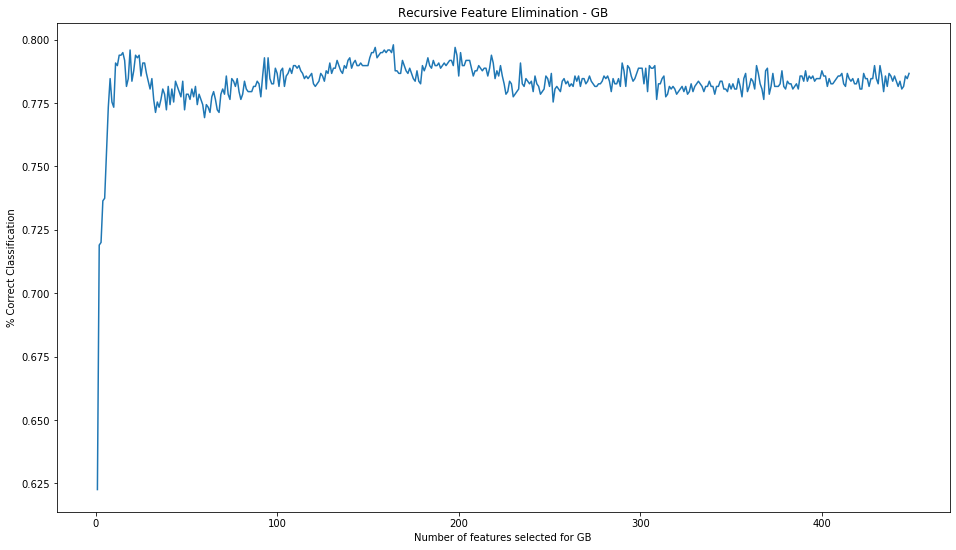

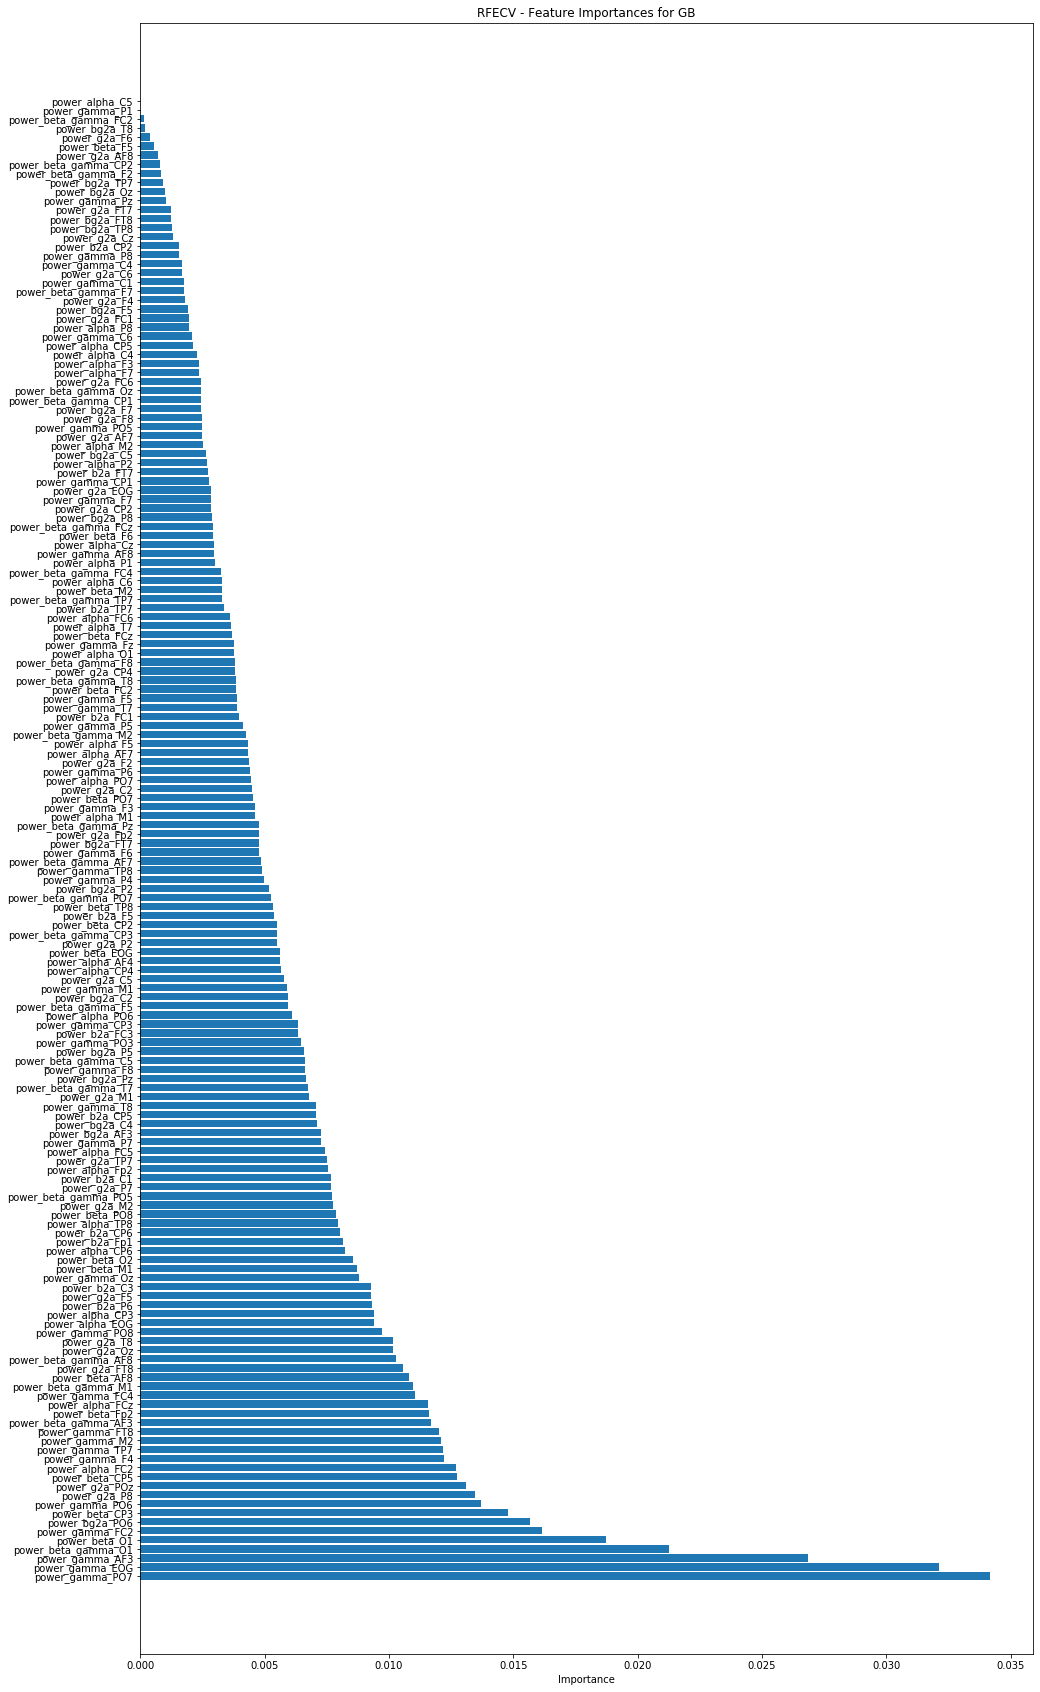

{'sub': 'all', 'accuracy': 0.7753846153846153, 'model': 'Gradient Boosting - RFE', 'rmse': 0.4739360554076727}


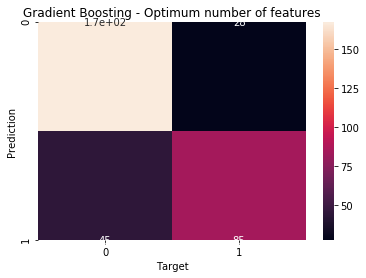

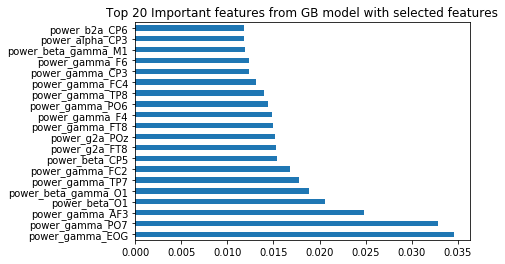

In [98]:
model = GradientBoostingClassifier()
rfecv = RFECV(estimator=model, step=1, scoring='accuracy')
rfecv.fit(x_train, y_train)
print('Optimal number of features for GB: {}'.format(rfecv.n_features_))

# Plot accuracy vs number of features.
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination - GB')
plt.xlabel('Number of features selected for GB')
plt.ylabel('% Correct Classification')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Plot important features.
dset = pd.DataFrame()
dset['attr'] = x_train.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1).columns.values
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)
plt.figure(figsize=(16, 30))
plt.barh(y=dset['attr'], width=dset['importance'])
plt.title('RFECV - Feature Importances for GB')
plt.xlabel('Importance')
plt.show()

# Train with selected features.
model = GradientBoostingClassifier().fit(x_train.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1), y_train)
y_pred = model.predict(x_test.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1))
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
acc = {'sub': 'all', 'accuracy': model.score(x_test.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1), y_test), 'model': 'Gradient Boosting - RFE', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Gradient Boosting - Optimum number of features')

plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=x_test.drop(x_train.columns[np.where(rfecv.support_ == False)[0]], axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Top 20 Important features from GB model with selected features')
plt.show()

# k best

In [35]:
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(x_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs','Score']
featureScores.nlargest(30,'Score')

Specs         Score
27        power_alpha_FC2  1.053722e+08
155        power_beta_FC2  6.250398e+07
219  power_beta_gamma_FC2  3.865205e+07
411       power_gamma_FC2  1.697452e+07
60         power_alpha_T7  2.711925e+05
1         power_alpha_AF4  2.512729e+05
0         power_alpha_AF3  2.122903e+05
188         power_beta_T7  1.979344e+05
129        power_beta_AF4  1.520643e+05
128        power_beta_AF3  1.355726e+05
22         power_alpha_F5  1.326315e+05
7          power_alpha_C4  1.324856e+05
252   power_beta_gamma_T7  1.223775e+05
150         power_beta_F5  9.728738e+04
29        power_alpha_FC4  9.274109e+04
192  power_beta_gamma_AF3  9.095888e+04
193  power_beta_gamma_AF4  9.019090e+04
135         power_beta_C4  7.256048e+04
143        power_beta_CP6  7.144453e+04
56        power_alpha_PO7  6.202584e+04
28        power_alpha_FC3  5.814471e+04
157        power_beta_FC4  5.741022e+04
214   power_beta_gamma_F5  5.705881e+04
31        power_alpha_FC6  5.663771e+04
159        power_beta_FC6  5.639035e+04
444        power_gamma_T7  5.371136e+04
384       power_gamma_AF3  5.207957e+04
41         power_alpha_O1  4.969716e+04
40         power_alpha_M2  4.903460e+04
37        power_alpha_Fpz  4.654896e+04

{'sub': 'all', 'accuracy': 0.7353846153846154, 'model': 'Random Forest', 'rmse': 0.5144077999169381}


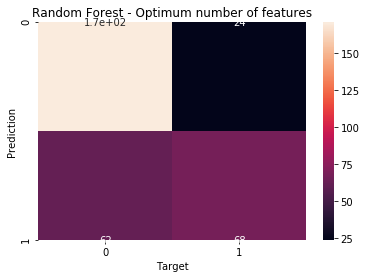

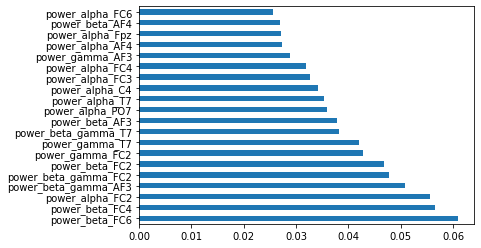

In [36]:
model = RandomForestClassifier().fit(x_train[featureScores.nlargest(30,'Score')['Specs'].values], y_train)
y_pred = model.predict(x_test[featureScores.nlargest(30,'Score')['Specs'].values])
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
acc = {'sub': 'all', 'accuracy': model.score(x_test[featureScores.nlargest(30,'Score')['Specs'].values], y_test), 'model': 'Random Forest', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Random Forest - Optimum number of features')

plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=x_test[featureScores.nlargest(30,'Score')['Specs'].values].columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
model = GradientBoostingClassifier().fit(x_train[featureScores.nlargest(30,'Score')['Specs'].values], y_train)
y_pred = model.predict(x_test[featureScores.nlargest(30,'Score')['Specs'].values])
y_pred = y_pred > 0.5
acc = accuracy_score(y_test, y_pred)
acc = {'sub': 'all', 'accuracy': model.score(x_test[featureScores.nlargest(30,'Score')['Specs'].values], y_test), 'model': 'Gradient Boosting - k best', 'rmse': get_rmse(y_test, y_pred)}
accuracy_list.append(acc)
print(acc)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Gradeint Boosting - k best')

plt.figure()
feat_importances = pd.Series(model.feature_importances_, index=x_test[featureScores.nlargest(30,'Score')['Specs'].values].columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Mixed model

In [37]:
md = smf.mixedlm("mep_category_absolute_binary ~ power_beta_FC2", df_powers, groups=df_powers["sub"])
mdf = md.fit()
print(mdf.summary())

y_pred = mdf.predict(x_test)
{'sub': 'all', 'accuracy': accuracy_score(y_test, y_pred > 0.5), 'model': 'Mixed Model', 'rmse': get_rmse(y_test, y_pred > 0.5)}

                  Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: mep_category_absolute_binary
No. Observations: 1300    Method:             REML                        
No. Groups:       7       Scale:              0.1651                      
Min. group size:  50      Likelihood:         -705.5524                   
Max. group size:  349     Converged:          Yes                         
Mean group size:  185.7                                                   
-----------------------------------------------------------------------------
                      Coef.    Std.Err.      z      P>|z|    [0.025    0.975]
-----------------------------------------------------------------------------
Intercept             0.361       0.113    3.205    0.001     0.140     0.582
power_beta_FC2        0.000       0.000    3.815    0.000     0.000     0.000
Group Var             0.088       0.127                                      



{'sub': 'all',
 'accuracy': 0.6153846153846154,
 'model': 'Mixed Model',
 'rmse': 0.6201736729460423}

In [ ]:
model = sm.GLM(y_train, x_train, family=)

In [62]:
md = smf.mixedlm("mep_category_absolute_binary ~ power_beta_FC2", df_powers, groups=df_powers["sub"], re_formula='~power_beta_FC2')
mdf = md.fit()
print(mdf.summary())

y_pred = mdf.predict(x_test)
acc = {'sub': 'all', 'accuracy': accuracy_score(y_test, y_pred > 0.5), 'model': 'Mixed Model', 'rmse': get_rmse(y_test, y_pred > 0.5)}
accuracy_list.append(acc)

                  Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: mep_category_absolute_binary
No. Observations: 1300    Method:             REML                        
No. Groups:       7       Scale:              0.1641                      
Min. group size:  50      Likelihood:         -730.0873                   
Max. group size:  349     Converged:          Yes                         
Mean group size:  185.7                                                   
---------------------------------------------------------------------------
                             Coef.   Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------
Intercept                     0.368     0.111  3.310  0.001   0.150   0.586
power_beta_FC2                0.000     0.005  0.024  0.981  -0.010   0.010
Group Var                     0.083     0.095                              
Group x power_beta_FC2 Cov   -0.000   

/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2059: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2115: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/statsmodels/base/model.py:128

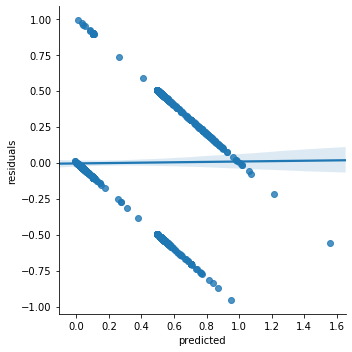

In [39]:
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["power_beta_FC2"] = df_powers['power_beta_FC2']
performance["predicted"] = mdf.fittedvalues
sns.lmplot(x = "predicted", y = "residuals", data = performance)

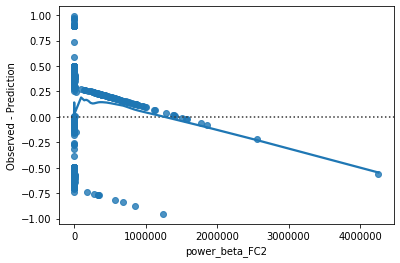

In [40]:
ax = sns.residplot(x = "power_beta_FC2", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

In [61]:
pd.DataFrame(accuracy_list)[['model', 'accuracy', 'rmse', 'sub']].sort_values('rmse')

model  accuracy      rmse  sub
5             GradientBoostingClassifier  0.784615  0.464095  all
7                          Random Forest  0.772308  0.477171  all
1   Logistic Regression - all electrodes  0.753846  0.496139  all
6                          Random Forest  0.753846  0.496139  all
3                          Decision Tree  0.747692  0.502302  all
8                          Random Forest  0.735385  0.514408  all
4                                    SGD  0.686154  0.560220  all
9                            Mixed Model  0.661538  0.581774  all
10                           Mixed Model  0.661538  0.581774  all
2                                    SVC  0.600000  0.632456  all
0   Logistic Regression - power_beta_FC2  0.400000  0.774597  all

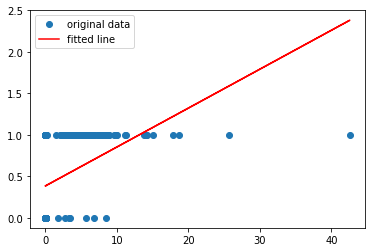

(0.04689395849362279,
 0.3857692486025316,
 0.23954162453716246,
 3.436339892490846e-14,
 0.006093232717337255)

In [56]:
import scipy.stats as sp
multiplier = 10e-6
slope, intercept, r_value, p_value, std_err = sp.linregress(x_train['power_beta_FC2'] * multiplier, y_train)

plt.plot(x_train['power_beta_FC2'] * multiplier, y_train, 'o', label='original data')
plt.plot(x_train['power_beta_FC2'] * multiplier, intercept + slope * x_train['power_beta_FC2'] * multiplier, 'r', label='fitted line')
plt.legend()
plt.show()
{'slope': slope, 'intercept': intercept, r_value, p_value, std_err}

# Stats

/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


<Figure size 432x288 with 0 Axes>

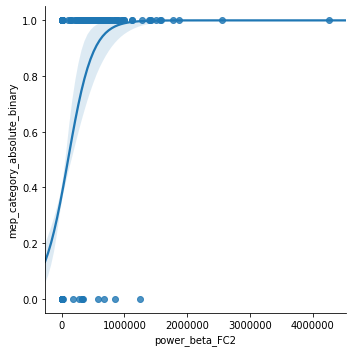

<Figure size 432x288 with 0 Axes>

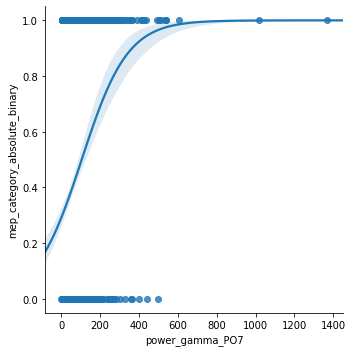

<Figure size 432x288 with 0 Axes>

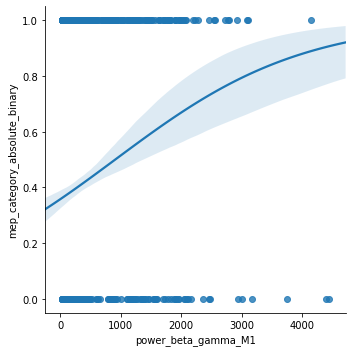

<Figure size 432x288 with 0 Axes>

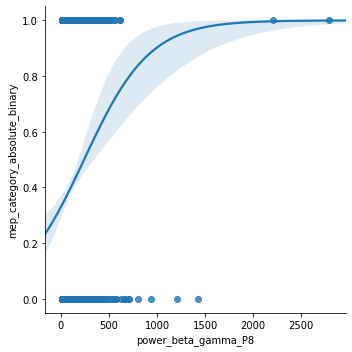

In [44]:
plt.figure()
sns.lmplot(x="power_beta_FC2", y="mep_category_absolute_binary", data=df_powers, logistic=True)
plt.figure()
sns.lmplot(x="power_gamma_PO7", y="mep_category_absolute_binary", data=df_powers, logistic=True)
plt.figure()
sns.lmplot(x="power_beta_gamma_M1", y="mep_category_absolute_binary", data=df_powers, logistic=True)
plt.figure()
sns.lmplot(x="power_beta_gamma_P8", y="mep_category_absolute_binary", data=df_powers, logistic=True)

<Figure size 432x288 with 0 Axes>

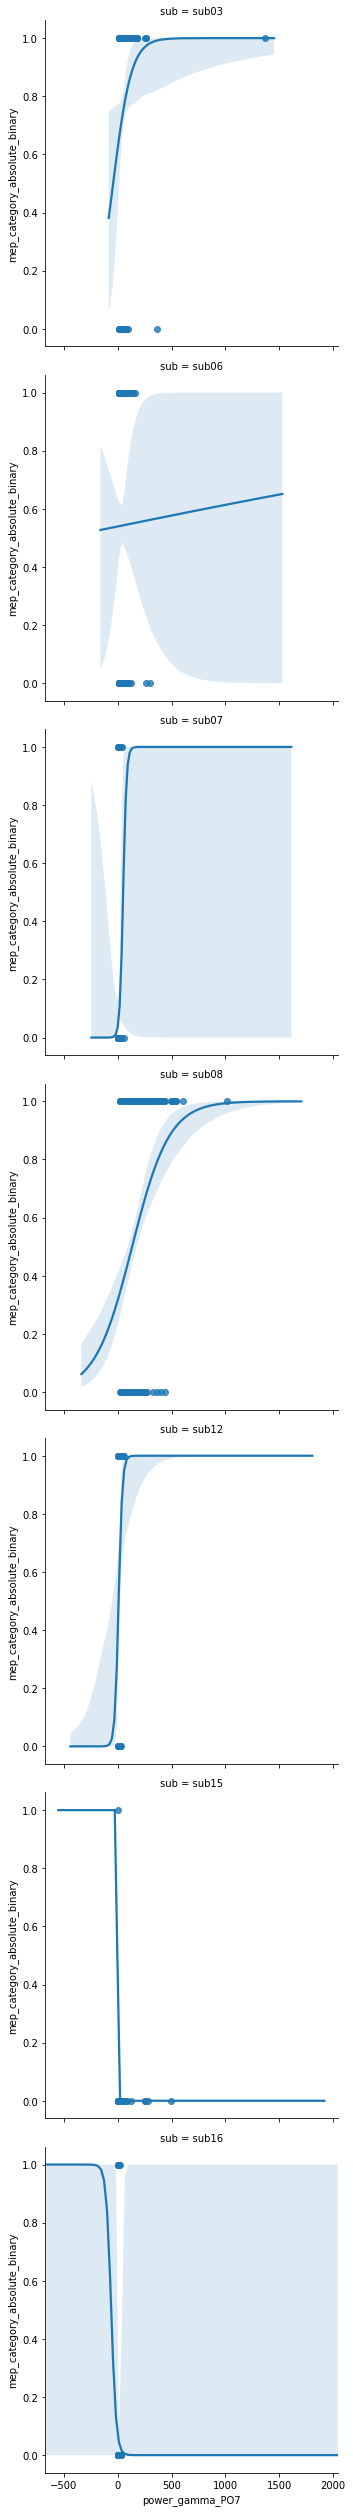

In [45]:
plt.figure()
sns.lmplot(x="power_gamma_PO7", y="mep_category_absolute_binary", row='sub', data=df_powers, logistic=True)

In [69]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
stats.ttest_ind(MinMaxScaler().fit_transform(df_powers[df_powers['mep_category_absolute_binary'] == 0][['power_beta_FC2']]), MinMaxScaler().fit_transform(df_powers[df_powers['mep_category_absolute_binary'] == 1][['power_beta_FC2']]))

Ttest_indResult(statistic=array([-6.02918849]), pvalue=array([2.14465256e-09]))

In [70]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
stats.ttest_ind(df_powers[df_powers['mep_category_absolute_binary'] == 0][['power_beta_FC2']], df_powers[df_powers['mep_category_absolute_binary'] == 1][['power_beta_FC2']])

Ttest_indResult(statistic=array([-8.71350033]), pvalue=array([8.82523915e-18]))

<Figure size 432x288 with 0 Axes>

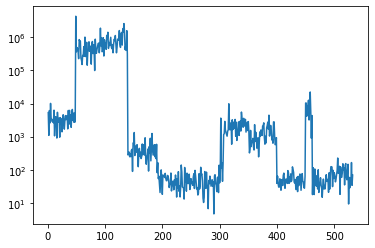

In [89]:
plt.figure()
fig, ax = plt.subplots()
ax.set(yscale="symlog")
plt.plot(np.linspace(1, 532, 532), df_powers[df_powers['mep_category_absolute_binary'] == 1][['power_beta_FC2']])

<Figure size 432x288 with 0 Axes>

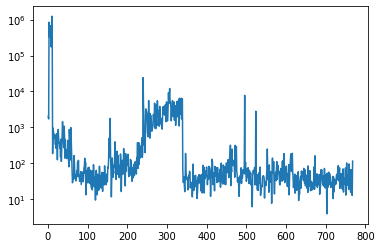

In [90]:
plt.figure()
fig, ax = plt.subplots()
ax.set(yscale="symlog")
plt.plot(np.linspace(1, 768, 768), df_powers[df_powers['mep_category_absolute_binary'] == 0][['power_beta_FC2']])

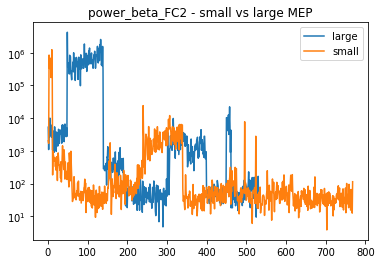

In [93]:
fig, ax = plt.subplots()
ax.set(yscale="symlog")
plt.plot(np.linspace(1, 532, 532), df_powers[df_powers['mep_category_absolute_binary'] == 1][['power_beta_FC2']], label='large')
plt.plot(np.linspace(1, 768, 768), df_powers[df_powers['mep_category_absolute_binary'] == 0][['power_beta_FC2']], label='small')
plt.title('power_beta_FC2 - small vs large MEP')
plt.legend()

In [76]:
df_powers[df_powers['mep_category_absolute_binary'] == 1][['power_beta_FC2']].shape

(532, 1)

In [77]:
df_powers[df_powers['mep_category_absolute_binary'] == 0][['power_beta_FC2']].shape

(768, 1)